# Advanced Pandas Working with Missing Data


## Introduction

In this section, we'll clean and analyze data on passenger survival from the [Titanic](https://en.wikipedia.org/wiki/RMS_Titanic). Each row contains information for a specific Titanic passenger.

Here are the first few rows of the dataset:


| PassengerId | Survived | Pclass | Name                                                | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Cabin | Embarked |
|-------------|----------|--------|-----------------------------------------------------|--------|------|-------|-------|------------------|---------|-------|----------|
| 1           | 0        | 3      | Braund, Mr. Owen Harris                             | male   | 22.0 | 1     | 0     | A/5 21171        | 7.2500  |    -   | S        |
| 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38.0 | 1     | 0     | PC 17599         | 71.2833 | C85   | C        |
| 3           | 1        | 3      | Heikkinen, Miss. Laina                              | female | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250  |    -   | S        |


Lets take a closer look at a few of the key columns:

- **pclass** - The passenger's cabin class from 1 to 3 where 1 was the highest class
- **survived** - 1 if the passenger survived, and 0 if they did not.
- **sex** - The passenger's gender
- **age** - The passenger's age
- **fare** - The amount the passenger paid for their ticket
- **embarked** - Either C, Q, or S, to indicate which port the passenger boarded the ship from.


Many of the columns, such as **sex** and **age**, have missing values.

Because missing values can cause errors in numerical functions, we'll need to deal with them before we can analyze the data. For instance, finding the mean of a column with a missing value will fail because it's impossible to average a missing value. Addressing missing values will let us perform calculations on the entire data set.

## Importing the data

Let's import the data set into pandas. You may notice at the start of the code, we import pandas differently from how we have previously.

```python
import pandas as pd
```

This gives the pandas library the alias **pd**, so that instead of typing pandas every time we want to use a function, we can instead type **pd**, for example **pd.read_csv()**.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

1. Read the file **titanic_survival.csv** into a dataframe called **titanic_survival**.

In [ ]:
# put your code here

## Finding the missing data



Missing data can take a few different forms:

- In Python, the **None** keyword and type indicates no value.
- The Pandas library uses **NaN**, which stands for **"not a number"**, to indicate a missing value.
- In general terms, both **NaN** and **None** can be called null values.

If we want to see which values are **NaN**, we can use the [pd.isnull()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) function which takes a pandas series and returns a series of **True** and **False** values, the same way that NumPy did when we compared arrays.


```python
sex = titanic_survival["sex"]
sex_is_null = pd.isnull(sex)
```

We can use this resultant series to select only the rows that have null values.

```python
sex_null_true = sex[sex_is_null]
```

We'll use this structure to look at the null values for the **"age"** column.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

1. Count how many values in the **"age"** column have null values:
    - Use **pandas.isnull()** on **age** variable to create a Series of **True** and **False** values. 
    - Use the resulting series to select only the elements in age that are null, and assign the result to **age_null_true**
    - Assign the length of **age_null_true** to **age_null_count**.
2. Print **age_null_count** to see how many null values are in the **"age"** column.

In [4]:
# put your code here

## missingno

Messy datasets? Missing values? [missingno](https://github.com/ResidentMario/missingno) provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. 

In [3]:
!conda install -c conda-forge missingno -y

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.19.2        |   py36h4f467ca_0         4.8 MB
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    missingno-0.4.1            |             py_0          10 KB  conda-forge
    numpy-1.14.6               |   py36h648b28d_4          46 KB
    openssl-1.0.2p             |       h470a237_1         2.9 MB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    numpy-base-1.14.6          |   py36h8a80b8c_4         4.0 MB
    scipy-1.1.0                |   py36hf1f7d93_0        15.4 MB
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    mkl-2019.0                 |              118       154.4 MB
    ----------

### Matrix

The **msno.matrix** nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

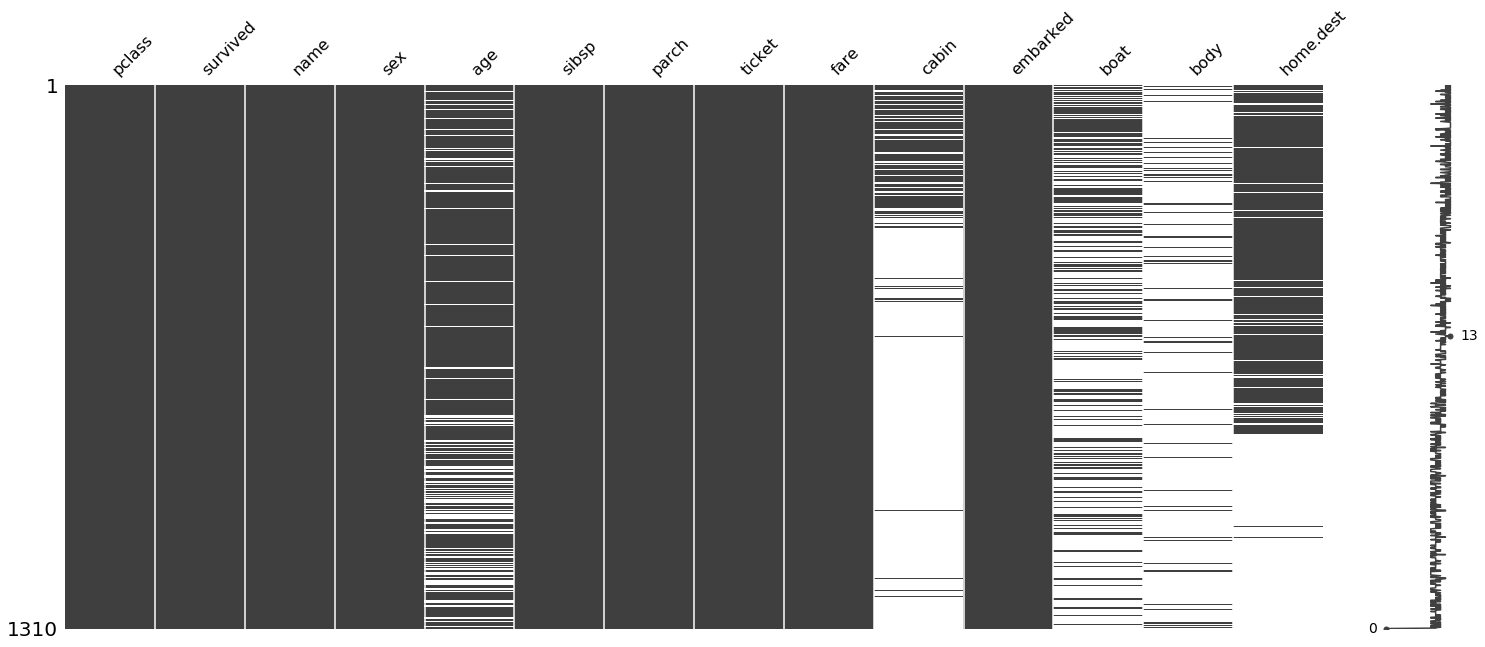

In [3]:
import missingno as msno
import matplotlib.pyplot as plt

# the sparkline at right summarizes the general shape of the data completeness 
# and points out the maximum and minimum rows. Note that last row is all NaN
msno.matrix(titanic_survival)

### Heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.

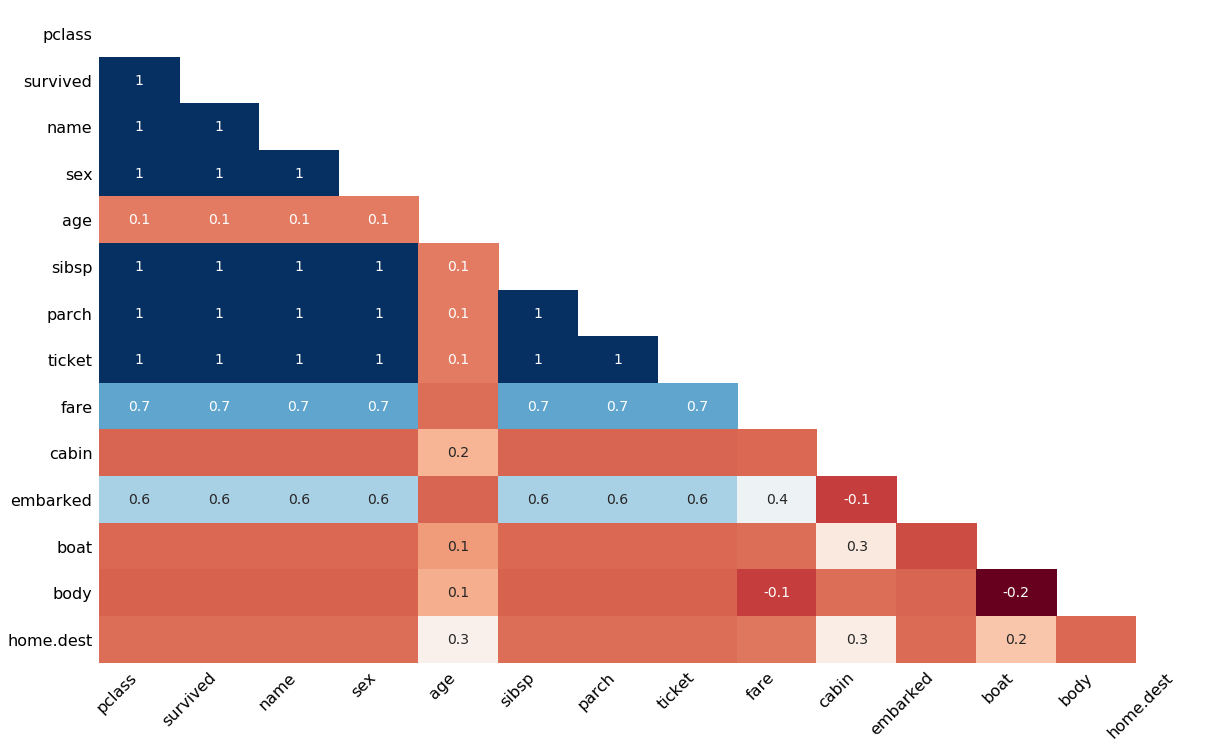

In [4]:
msno.heatmap(titanic_survival)

### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

In [5]:
titanic_survival.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

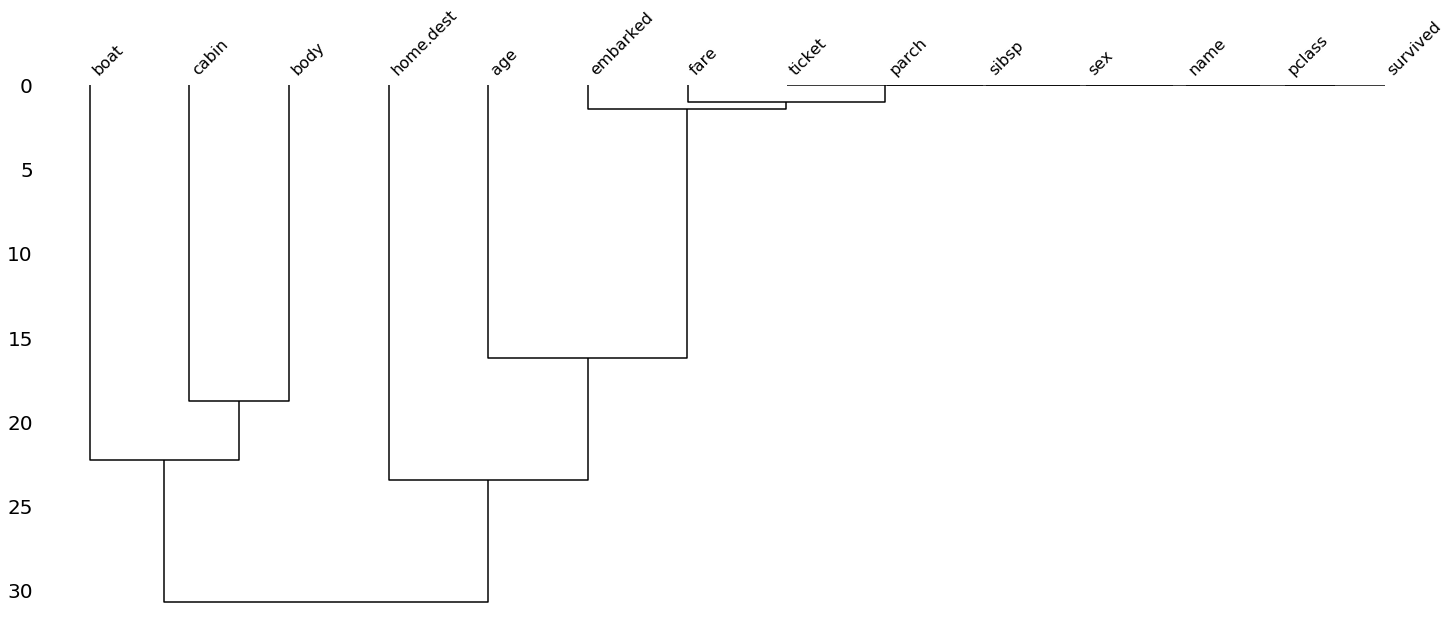

In [6]:
msno.dendrogram(titanic_survival)

## Whats The Big Deal With Missing Data?




So, we know that quite a few values are missing from the **"age"** column, and other columns are missing data too. But why is this a problem?

Lets look at a typical approach to calculate the average for the **"age"** column:

```python
mean_age = sum(titanic_survival["age"]) / len(titanic_survival["age"])
```

The result of this is that **mean_age** would be **nan**. This is because any calculations we do with a null value also result in a null value. This makes sense when you think about it -- how can you add a null value to a known value?

Instead, we have to filter out the missing values before we calculate the mean.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Use **age_is_null** to create a vector that only contains values from the **"age"** column that aren't **NaN**.
```python
age_is_null = pd.isnull(titanic_survival["age"])
```
2. Calculate the mean of the new vector, and assign the result to **correct_mean_age**.


In [ ]:
# put your code here

## Easier Ways To Do Math



Luckily, missing data is so common that many pandas methods automatically filter for it. For example, if we use use the [Series.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html) method to calculate the mean of a column, missing values will not be included in the calculation.

To calculate the mean age that we did earlier, we can replace all of our code with one line

```python
correct_mean_age = titanic_survival["age"].mean()
```

Using the built in method is much easier, but it's import to understand what is happening behind the scenes.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

1. Assign the mean of the **"fare"** column to **correct_mean_fare**.

In [ ]:
# put your code here

## Calculating Summary Statistics




Let's calculate more summary statistics for the data. The **pclass** column indicates the cabin class for each passenger, which was either first **class (1)**, **second class (2)**, or **third class (3)**. You'll use the list **passenger_classes**, which contains these values, in the following exercise.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Use a for loop to iterate over **passenger_classes**. 
```python
passenger_classes = [1, 2, 3]
fares_by_class = {}
```
    - Within the for loop:
        - Select just the rows in **titanic_survival** where the **pclass** value is equivalent to the current iterator value (class).
        - Select just the **fare** column for the current subset of rows.
        - Use the **Series.mean** method to calculate the mean of this subset.
        - Add the mean of the class to the **fares_by_class** dictionary with class as the key.
2. Once the loop completes, the dictionary **fares_by_class** should have **1, 2, and 3** as keys, with the average fares as the corresponding values.


In [13]:
# put your code here

## Making Pivot Tables



[Pivot tables](https://en.wikipedia.org/wiki/Pivot_table) provide an easy way to subset by one column and then apply a calculation like a sum or a mean. The concept of Pivot tables was popularized with the introduction of the 'PivotTable' feature in Microsoft Excel in the mid 1990's.

Pivot tables first group and then apply a calculation. In the previous screen, we actually made a pivot table manually by grouping by the column **"pclass"** and then calculating the mean of the **"fare"** column for each class.

Luckily, we can use the [Dataframe.pivot_table()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) method instead, which simplifies the kind of work we did on the last screen. To produce the same data, we could use one line.

```python
passenger_class_fares = titanic_survival.pivot_table(index="pclass", values="fare", aggfunc=np.mean)
```



The first parameter of the method, index tells the method which column to group by. The second parameter values is the column that we want to apply the calculation to, and aggfunc specifies the calculation we want to perform. The default for the **aggfunc** parameter is actually the mean, so if we're calculating this we can omit this parameter.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


**Description**:

1. Use the **DataFrame.pivot_table()** method to calculate the **mean age** for each passenger class (**"pclass"**).
2. Assign the result to **passenger_age**.
3. Display the **passenger_age** pivot table using the **print()** function.

In [ ]:
# put your code here

## More complex pivot tables



We can use the **DataFrame.pivot_table()** method to perform even more advanced tasks. If we pass a list of column names to the values parameter instead of a single value, we can perform calculations on multiple columns at once.

We can also specify a custom calculation to be made. For instance, if we pass **np.sum** to the **aggfunc** parameter it will total the values in each column.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:

1. Make a pivot table that calculates the total fares collected (**"fare"**) and total number of survivors (**"survived"**) for each embarkation port (**"embarked"**).
2. Assign the result to **port_stats**.
3. Display **port_stats** using the **print()** function.

In [ ]:
# put your code here

## Droping missing values



We learned how to remove the missing values in a vector of data, but how about in a matrix?

We can use the [DataFrame.dropna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) method on pandas **DataFrames** to do this. The method will drop any rows that contain missing values.

The **dropna()** method takes an axis parameter, which indicates whether you would like to drop rows or columns. Specifying **axis=0** or **axis='index'** will drop any rows that have null values, while specifying **axis=1** or **axis='columns'** will drop any columns that have null values. We will use 0 and 1 since they're more commonly used, but you can use either.

The code below will drop all rows in **titanic_survival** that have null values.

```python
drop_na_rows = titanic_survival.dropna(axis=0)
```

There is also a parameter that allows you to specify a list of columns or rows to look at when using **dropna()**. You will need to use this in the next exercise - take a look at the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) to work out the name of this parameter and how it works.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


**Description**:

1. Drop all columns in **titanic_survival** that have missing values and assign the result to **drop_na_columns**.
2. Drop all rows in **titanic_survival** where the columns **"age"** or **"sex"** have missing values and assign the result to **new_titanic_survival**.


In [ ]:
# put your code here

## Guided Challenge

In [43]:
titanic_survival["agecat"] = pd.cut(titanic_survival.age,
                        bins=[0,5,10,18,30,50,65,100],
                        labels=["Infant","Child","Teenager",
                                "Young adult","Adult","Senior adult","Senior"])


In [48]:
# clean the columns if necessary
# titanic_survival.dropna(subset=["age"],inplace=True)

In [49]:
titanic_pivot = titanic_survival.pivot_table(index=["agecat","survived"],
                             values="age",
                             aggfunc="count").rename(columns={"age": "count"})
titanic_pivot

count
agecat       survived       
Young adult  0.0          19
             1.0          37
Infant       0.0          17
             1.0          13
Adult        0.0          62
             1.0          45
Senior adult 0.0         263
             1.0         153
Senior       0.0         201
             1.0         141
Teenager     0.0          49
             1.0          36
Child        0.0           8
             1.0           2

In [53]:
titanic_survival.pivot_table(index=["agecat","survived"],
                 values="age",
                 aggfunc=lambda x: len(x)/len(titanic_survival)).rename(columns={"age":"survived_rate"})

survived_rate
agecat       survived               
Young adult  0.0            0.018164
             1.0            0.035373
Infant       0.0            0.016252
             1.0            0.012428
Adult        0.0            0.059273
             1.0            0.043021
Senior adult 0.0            0.251434
             1.0            0.146272
Senior       0.0            0.192161
             1.0            0.134799
Teenager     0.0            0.046845
             1.0            0.034417
Child        0.0            0.007648
             1.0            0.001912

In [86]:
# other way
titanic_pivot["survived_rate"] = titanic_pivot["count"]/titanic_pivot["count"].sum()

In [87]:
titanic_pivot

count  survived_rate
agecat       survived                      
Young adult  0.0          19       0.018164
             1.0          37       0.035373
Infant       0.0          17       0.016252
             1.0          13       0.012428
Adult        0.0          62       0.059273
             1.0          45       0.043021
Senior adult 0.0         263       0.251434
             1.0         153       0.146272
Senior       0.0         201       0.192161
             1.0         141       0.134799
Teenager     0.0          49       0.046845
             1.0          36       0.034417
Child        0.0           8       0.007648
             1.0           2       0.001912

In [95]:
# access elements in a multi-index
titanic_pivot.loc["Young adult","count"].loc[0]

19

# Storytelling from Seaborn

## Introduction to Seaborn



So far, we've mostly worked with plots that are quick to analyze and make sense of. Line charts, scatter plots, and bar plots allow us to convey a few nuggets of insights to the reader. We've also explored how we can combine those plots in interesting ways to convey deeper insights and continue to extend the storytelling power of data visualization. In this mission, we'll explore how to quickly create plots that are suitable to statistical analysis using a specific library for this purpose.  

We'll be working with the [seaborn](http://seaborn.pydata.org/) visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Here are some examples of some complex plots that can be created using seaborn:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0WS1ZUnpCeE1xTms">

**Seaborn** aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

The plotting functions try to do something useful when called with a minimal set of arguments, and they expose a number of customizable options through additional parameters. Some of the functions plot directly into a matplotlib axes object, while others operate on an entire figure and produce plots with several panels. In the latter case, the plot is drawn using a Grid object that links the structure of the figure to the structure of the dataset.

Seaborn should be thought of as a complement to matplotlib, not a replacement for it. When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. Further, the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), but full customization will require changing attributes on the matplotlib objects directly. The combination of seaborn’s high-level interface and matplotlib’s customizability and wide range of backends makes it easy to generate publication-quality figures.



In [60]:
!conda install -c conda-forge seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |             py_0         159 KB  conda-forge

The following packages will be UPDATED:

    seaborn: 0.8.1-py36h595ecd9_0 --> 0.9.0-py_0 conda-forge


seaborn-0.9.0        | 159 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done



## Getting started



There are interesting tutorals over the internet about seaborn. In this mission is not our goal to give a complete course about seaborn. We just use the fuctions acoording to need. 

- https://elitedatascience.com/python-seaborn-tutorial
- http://seaborn.pydata.org/tutorial.html
- https://gist.github.com/mwaskom/8224591
- https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
- https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. Read **titanic_survival.csv** into a DataFrame named **titanic**. Keep only the following columns:
    - **survived**
    - **pclass**
    - **sex**
    - **age**
    - **sibsp**
    - **parch**
    - **fare**
    - **embarked**


In [ ]:
# put your code here

## Creating histogram in seaborn



Seaborn works similarly to the **pyplot** module from **matplotlib**. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the **pyplot** module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call **pyplot.show()**.

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the **Fare** column using the [seaborn.distplot()](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) function. 

**seaborn.distplot()**  flexibly plot a univariate distribution of observations. This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn [kdeplot()](http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) and [rugplot()](http://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot) functions. It can also fit **scipy.stats** distributions and plot the estimated PDF over the data.

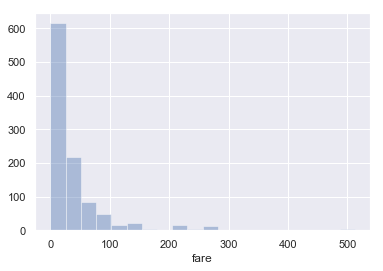

In [103]:
# seaborn is commonly imported as `sns`.
import matplotlib.pyplot as plt
import seaborn as sns

titanic.dropna(subset=["fare"],inplace=True)

#call seaborn default colors
sns.set()

# Contexts: paper, notebook, talk, and poster
sns.set_context("notebook")

# plot a univariate distribution of observations.
sns.distplot(titanic["fare"],kde=False,
            bins=20)

plt.show()

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about how KDE works, you can read more on [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation).

What you need to know for now is that the resulting line is a smoother version of the histogram, called a **kernel density plot**. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"><left>

1. Import **seaborn** as **sns** and **matplotlib.pyplot** as **plt**.
2. Use the **seaborn.distplot()** function to visualize the distribution of the **"age"** column.
3. Display the plot using **pyplot.show()**.

In [ ]:
# put your code here

## Generating A Kernel Density Plot



While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. To generate just the kernel density plot, we use the **seaborn.kdeplot()** function:

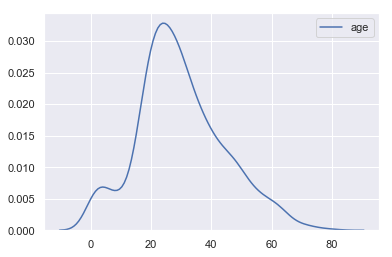

In [109]:
sns.kdeplot(titanic["age"])
plt.show()

While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the **seaborn.kdeplot()** function, we can shade the area under the line by setting the **shade** parameter to **True**.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Generate a kernel density plot:
    - Using the values in the **"age"** column
    - With the area under the curve shaded
2. Set the x-axis label to **"age"** using **pyplot.xlabel()**.

In [ ]:
# put your code here

## Modifying The Appearance Of The Plots



From the plots in the previous step, you'll notice that seaborn:

- Sets the x-axis label based on the column name passed through **plt.xlabel()** function
- Sets the background color to a light gray color
- Hides the x-axis and y-axis ticks
- Displays the coordinate grid


In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the **seaborn.set_style()** function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

- **darkgrid**: Coordinate grid displayed, dark background color
- **whitegrid**: Coordinate grid displayed, white background color
- **dark**: Coordinate grid hidden, dark background color
- **white**: Coordinate grid hidden, white background color
- **ticks**: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0OVQ1bDFuc2FuZmc">


By default, the seaborn style is set to **"darkgrid"**:

```python
sns.set_style("darkgrid")
```

If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

You can also personalize the seaborn style using an axes property according your preferences. 

```python
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}
```

For example, if you can keep the xtick bottom available, then:

```python
sns.set_style("darkgrid",{'xtick.bottom': True})
```


To remove the axis spines for the top and right axes, we use the **seaborn.despine()** function:

```python
sns.despine()
```

By default, only the top and right axes will be **despined**, or have their spines removed. To despine the other two axes, we need to set the **left** and **bottom** parameters to **True**.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Set the style to **"ticks"** and remove xtick bottom and ytick left. 
- Generate a kernel density plot of the **"age"** column, with the area under the curve shaded.
- Set the x-axis label to **"age"**.
- Despine all of the axes.


In [ ]:
# put your code here

## Conditional Distributions Using A Single Condition




In the last few missions, we created a [small multiple](https://en.wikipedia.org/wiki/Small_multiple), which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the **"age"** column where **survived** equalled 0 and the other would visualize the distribution of values in the **"age"** column where **survived** equalled 1.

The code to generate the pair of plots, is short and sweet:

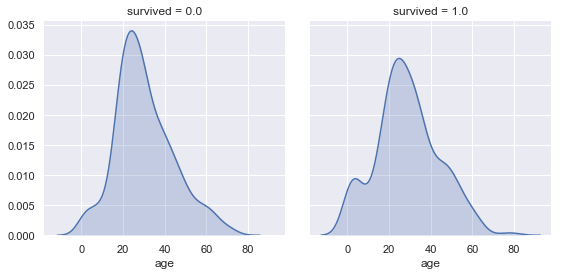

In [154]:
# set the style
sns.set_style("darkgrid")

# Condition on unique values of the "survived" column.
g = sns.FacetGrid(titanic, col="survived", height=4)

# Generate a KDE plot to "age" column.
g.map(sns.kdeplot, "age", shade=True)

# remove left and bottom spines
g.despine(left=True, bottom=True)

# Plot the graph
plt.show()

Seaborn handled:

- subsetting the data into rows where **survived** is 0 and where **survived** is 1
- creating both Axes objects, ensuring the same axis scales
- plotting both kernel density plots


Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The [seaborn.FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word **"facet"** from **FacetGrid** is another word for **"subset"**. Setting the col parameter to **"survived"** specifies a separate plot for each unique value in the **survived** column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the **FacetGrid.map()** method to specify the plot we want for each unique value of **survived**. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into **FacetGrid.map()** has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

```python
g = sns.FacetGrid(titanic, col="survived", height=4)
g.map(plt.hist, "age")
```

Let's create a grid of plots that displays the age distributions for each class.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Use a **FacetGrid** instance to generate three plots on the same row:
    - One for each unique value of **pclass**.
    - Each plot should be a kernel density plot of the **"age"** column, with the area under the curve shaded.
    - Each plot should have a height of **4** inches.
2. Remove all of the spines using **seaborn.despine()**.
3. Display the plots.


In [ ]:
# put your code here

## Creating Conditional Plots Using Two Conditions



We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a  **FacetGrid**, we use the **row** parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

The starter code subsets the dataframe on different combinations of unique values in both the **pclass** and **survived** columns. 


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Try changing the conditions to see the resulting plots.

In [ ]:
# put your code here


## Creating Conditional Plots Using Three Conditions



When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the **hue** parameter to the column name from the dataframe.

Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. Use a **FacetGrid** instance to generate a grid of plots using the following conditions:
    - The **survived** column across the columns in the grid.
    - The **pclass** column across the rows in the grid.
    - The **sex** column using different hues.
2. Each plot should be a kernel density plot of the **"age"** column, with the area under the curve shaded.
3. Each plot should have a height of **3** inches.
4. Remove all of the spines using **seaborn.despine()**.
5. Display the plots.

In [ ]:
# put your code here

## Adding a legend


Now that we're coloring plots, we need a legend to keep track of which value each color represents. As a challenge to you, we won't specify how exactly to generate a legend in seaborn. Instead, we encourage you to use the examples from the [page](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) on plotting using the FacetGrid instance.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Use a **FacetGrid** instance to generate a grid of plots using the following conditions:
    - The **survived** column across the columns in the grid.
    - The **pclass** column across the rows in the grid.
    - The **sex** column using different hues.
2. Each plot should be a kernel density plot of the **"age"** column, with the area under the curve shaded.
3. Each plot should have a height of 3 inches.
4. Add a legend for the **sex** column.
5. Remove all of the spines using **seaborn.despine()**.
6. Display the plots.

In [ ]:
# put your code here